<a href="https://colab.research.google.com/github/gnyaneshnaickar/Pneumonia-Detection/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pneumonia-Detection-using-Deep-Learning

In [ ]:
#imported required packages
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
# To mount your drive inside drive folder execute following 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# creating the image data generator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [ ]:
# loading the train image dataset
train_images = "/content/drive/MyDrive/chest_xray/train"

In [ ]:
# preparing an iterator for scaling train images
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
# preparing an iterator for scaling test images
test_datagen = ImageDataGenerator(rescale = 1./255)
# preparing an iterator for scaling validation images
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [ ]:
# defining the model
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
# compiling the model
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
# fitting the model with the generator
history = model.fit(train_generator, epochs = 50, validation_data = validation_generator)

Epoch 1/50
41/41 [==============================] - 1176s 28s/step - loss: 0.6273 - accuracy: 0.7299 - val_loss: 0.8528 - val_accuracy: 0.5000
Epoch 2/50
41/41 [==============================] - 607s 15s/step - loss: 0.4254 - accuracy: 0.8117 - val_loss: 0.6114 - val_accuracy: 0.6250
Epoch 3/50
41/41 [==============================] - 603s 15s/step - loss: 0.2702 - accuracy: 0.8882 - val_loss: 1.0997 - val_accuracy: 0.6875
Epoch 4/50
41/41 [==============================] - 604s 15s/step - loss: 0.2143 - accuracy: 0.9112 - val_loss: 0.5017 - val_accuracy: 0.8125
Epoch 5/50
41/41 [==============================] - 513s 12s/step - loss: 0.1859 - accuracy: 0.9241 - val_loss: 1.5745 - val_accuracy: 0.6250
Epoch 6/50
41/41 [==============================] - 515s 12s/step - loss: 0.1788 - accuracy: 0.9283 - val_loss: 1.0059 - val_accuracy: 0.6250
Epoch 7/50
41/41 [==============================] - 513s 12s/step - loss: 0.1805 - accuracy: 0.9285 - val_loss: 0.9447 - val_accuracy: 0.6250
Epoch

In [ ]:
# Save the trained model
model.save("trained.h5")

In [ ]:
# Use the loaded pickled model to make predictions
model = load_model("trained.h5")

In [ ]:

# creating the image data generator
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/test',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)
# evaluating the model
eval_result = model.evaluate_generator(test_generator, 624)
print('loss :', eval_result[0])
print('accuracy :', eval_result[1])

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


loss : 0.23275145888328552
accuracy : 0.9342948794364929


In [ ]:
# Keep in mind that before feeding any image to Keras, we need to convert it to a standard format since pre-trained models expect the input to be of a specific size.
img= cv2.imread('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0017-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

array([[0.08273536]], dtype=float32)

Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

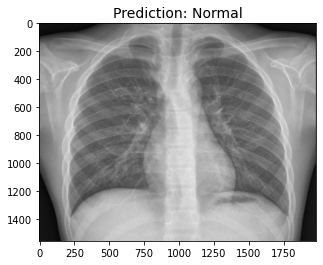

In [ ]:
# making prediction whether pneumonia or normal
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)